In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8KDCsW14kev1L9Deotbe")
project = rf.workspace("ws-qwbuh").project("constellation-dsphi")
version = project.version(1)
dataset = version.download("yolov5")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Constellation-1 in yolov5pytorch:: 100%|██████████| 4700/4700 [00:00<00:00, 6739.06it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 17265 (delta 107), reused 60 (delta 60), pack-reused 17079 (from 2)
Receiving objects: 100% (17265/17265), 15.93 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (11813/11813), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 25.6 MB/s eta 0:00:00


In [ ]:
!find /content -type d -name "*sample_data*"
!mv /content/sample_data /content/yolov5/data



/content/sample_data


In [ ]:
!cat /content/Constellation-1/data.yaml


names:
- aquila
- bootes
- canis_major
- canis_minor
- cassiopeia
- cygnus
- gemini
- leo
- lyra
- moon
- orion
- pleiades
- sagittarius
- scorpius
- taurus
- ursa_major
nc: 16
roboflow:
  license: CC BY 4.0
  project: constellation-dsphi
  url: https://universe.roboflow.com/project/constellation-dsphi/dataset/1
  version: 1
  workspace: project
test: ../test/images
train: /content/Constellation-1/train/images
val: /content/Constellation-1/valid/images


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/Constellation-1/data.yaml --weights yolov5s.pt --cache


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      26/49      4.45G     0.0381    0.02669   0.002935        103        640:  44% 45/103 [00:13<00:23,  2.45it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      26/49      4.45G    0.03816    0.02653   0.002911         52        640:  45% 46/103 [00:13<00:23,  2.48it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      26/49      4.45G    0.03822    0.02667   0.002936         94        640:  46% 47/103 [00:14<00:21,  2.63it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [ ]:
import os
folder_path = '/content/drive/MyDrive/YoloModel'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
# Save the YOLOv5 model to the mounted Google Drive folder
model.save('/content/drive/MyDrive/YoloModel/yolov5_model.pt')









In [ ]:
from google.colab import files
uploaded=files.upload()


Saving con.jpg to con.jpg


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source con.jpg


detect: weights=['runs/train/exp/weights/best.pt'], source=con.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/con.jpg: 384x640 1 cassiopeia, 1 pleiades, 27.7ms
Speed: 0.5ms pre-process, 27.7ms inference, 599.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/Constellation-1/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/Constellation-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/469 /content/Constellation-1/valid/images/2022-01-01-00-00-00-n_png_jpg.rf.c36f8aeb37a55f7d0f0fd81fa0b9bfb7.jpg: 640x640 1 cassiopeia, 1 ursa_major, 11.6ms
image 2/469 /content/Constellation-1/valid/images/2022-01-02-00-00-00-s_png_jpg.rf.29201cd8

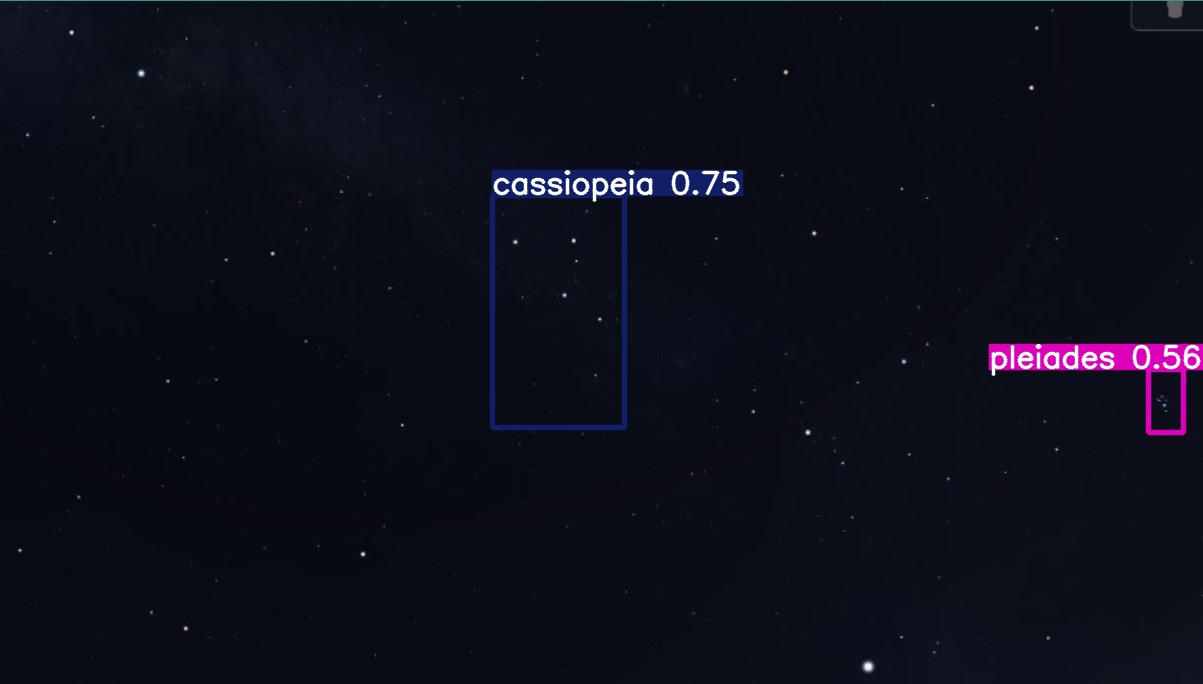

In [ ]:
from IPython.display import Image
display(Image(filename='runs/detect/exp2/con.jpg'))
